In [19]:
import pandas as pd
import sys
from tqdm import tqdm
sys.path.append("../")
from tcad.deep.fit import train_encoder
from tcad.tools.nntools import SmilesDataSet
from tcad.deep.models import CNNAutoEncoder
from torch.utils.data import DataLoader
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

## Load and encode data

In [2]:
data = pd.read_csv("../data/androgen_data.csv")
smiles = data["canonical_smiles"].to_list()
smiles_dataset = SmilesDataSet(smiles)

## Plot encoded SMILEs

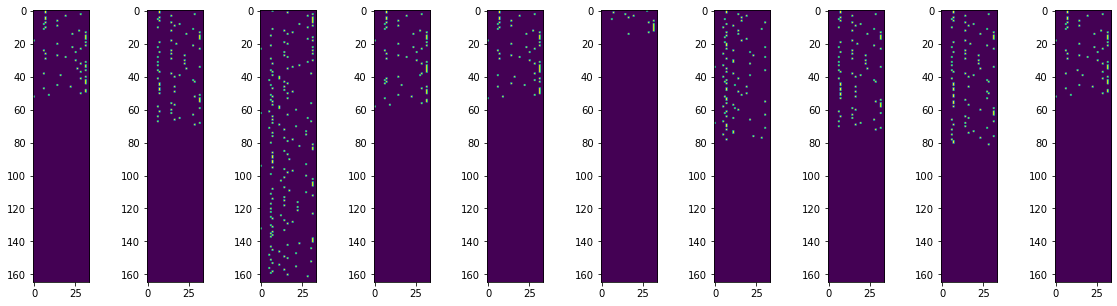

In [3]:
_, ax = plt.subplots(1, 10, figsize = (20, 5))
for i in range(10):
    ax[i].imshow(smiles_dataset[i].squeeze())

## Set up model and parameters

In [4]:
resulting_dim = 256

dataloader = DataLoader(smiles_dataset, batch_size=64)
model = CNNAutoEncoder(resulting_dim).to("cuda")

optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
criterion = torch.nn.MSELoss()
num_epochs = 250

## Train model

100%|██████████| 250/250 [04:54<00:00,  1.18s/it]


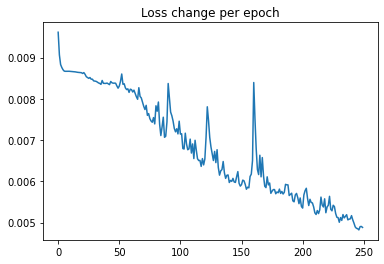

In [5]:
losses = []

for i in tqdm(range(num_epochs)):
    losses.append(train_encoder(model, dataloader, optimizer, criterion))

plt.plot(losses)
plt.title("Loss change per epoch")
plt.show()

## Get and plot decoded SMILEs

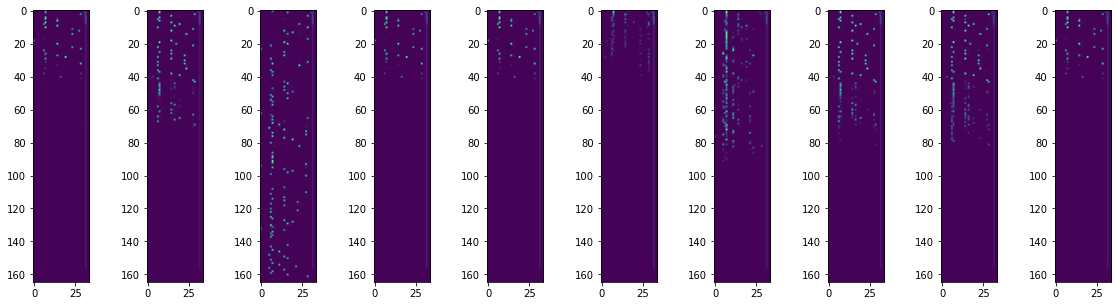

In [25]:
in_data = next(iter(dataloader)).to("cuda")
out = model(in_data).to("cuda")
out = out.detach().cpu().numpy().squeeze()

_, ax = plt.subplots(1, 10, figsize = (20, 5))

for i in range(10):
    ax[i].imshow(out[i])

## Get encoded vectors

In [26]:
encoded = model(in_data, return_embedings=True).to("cuda")
encoded = encoded.detach().cpu().numpy().squeeze()
print(f"Encoded fragment: {encoded[0][:3]}")

Encoded fragment: [0.00157491 0.08256067 0.1338902 ]


## PCA on encoded SMILEs

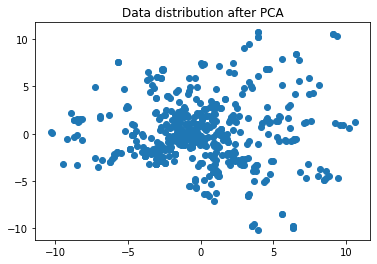

In [27]:
pca = PCA(2)
transformed_data = pca.fit_transform(encoded)

plt.scatter(x=transformed_data[:,0], y=transformed_data[:,1])
plt.title("Data distribution after PCA")
plt.show()